In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import roc_auc_score, roc_curve
import seaborn as sns

import datapackage
import pandas as pd


%matplotlib inline

In [2]:
data_url = 'https://datahub.io/machine-learning/ionosphere/datapackage.json'

# to load Data Package into storage
package = datapackage.Package(data_url)

# to load only tabular data
resources = package.resources
for resource in resources:
    if resource.tabular:
        data = pd.read_csv(resource.descriptor['path'])
#         print (data)

data.head()

,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,...,a26,a27,a28,a29,a30,a31,a32,a33,a34,class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [3]:
data["class"].value_counts()

g    225
b    126
Name: class, dtype: int64

In [4]:
X = data.drop("class", axis=1)
y = data["class"]
y = (y == "b") * 1 

print(X.shape)
print(np.unique(y, return_counts=True))

(351, 34)
(array([0, 1]), array([225, 126]))


In [5]:
n_negative = len(y[y==0])

In [6]:
X_in = X[y==0]
X_out = X[y==1]

In [7]:
X_train = X_in[:n_negative//2]
X_test = np.vstack([X_in[n_negative//2:], X_out])

y_test = np.concatenate([np.zeros(len(X_in[n_negative//2:])),np.ones(len(X[y==1]))])
n_test_normal = sum(y_test == 0)

In [8]:
# model = EllipticEnvelope(contamination=0.01)
model = svm.OneClassSVM(nu = 0.01)
model.fit(X_train)

OneClassSVM(nu=0.01)

In [14]:
# model.score_samples(X_test)

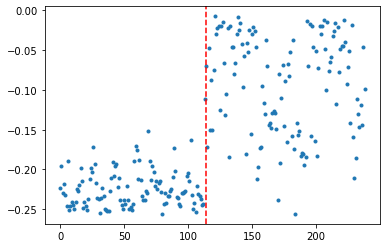

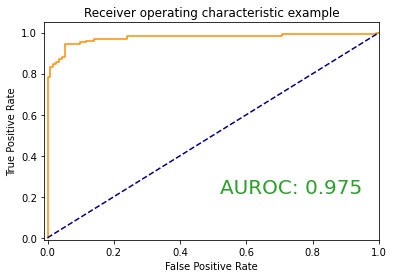

In [10]:
anomaly_score = - model.score_samples(X_test) 

auroc = roc_auc_score(y_test, anomaly_score)

plt.plot(anomaly_score,".")
plt.axvline(x = n_test_normal + 1, color='r', linestyle='--', label='normal:abnormal')
plt.show()

x, y , _ = roc_curve(y_test, anomaly_score)
plt.plot(x,y, color="darkorange" )
plt.title("Receiver operating characteristic example")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.text(0.95, 0.2, "AUROC: " +str(round(auroc, 3)), {"color": "C2", "fontsize": 20},
va="bottom", ha="right")

plt.xlim([- 0.01, 1.0])
plt.ylim([- 0.01, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


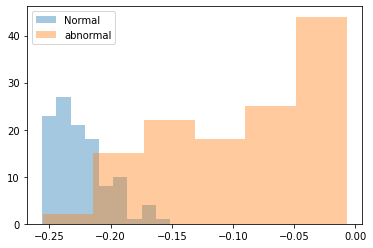

In [11]:
sns.distplot(anomaly_score[:n_test_normal], kde=False, label="Normal")
sns.distplot(anomaly_score[n_test_normal:], kde=False, label="abnormal")
plt.legend()